## Clean Neural Network Implementation

In [1]:
import torch

# Dataset
torch.manual_seed(42)
n_samples = 100
x0 = torch.randn(n_samples, 2) * 0.75 + torch.tensor([2.0, 2.0])
x1 = torch.randn(n_samples, 2) * 0.75 + torch.tensor([-2.0, -2.0])
X = torch.cat([x0, x1], dim=0)
y = torch.cat([torch.zeros(n_samples), torch.ones(n_samples)]).view(-1, 1)

# Initialize weights and biases
torch.manual_seed(42)
W1 = torch.randn(2, 4, requires_grad=True)
b1 = torch.zeros(1, 4, requires_grad=True)
W2 = torch.randn(4, 1, requires_grad=True)
b2 = torch.zeros(1, 1, requires_grad=True)

# Forward pass function
def forward(X):
    z1 = X @ W1 + b1
    a1 = torch.relu(z1)
    z2 = a1 @ W2 + b2
    return torch.sigmoid(z2)

# Binary Cross Entropy Loss
def binary_cross_entropy(pred, target):
    eps = 1e-7
    pred = torch.clamp(pred, eps, 1 - eps)
    return -(target * torch.log(pred) + (1 - target) * torch.log(1 - pred)).mean()

# Training loop
lr = 0.1
epochs = 1000

for epoch in range(epochs):
    y_pred = forward(X)
    loss = binary_cross_entropy(y_pred, y)
    loss.backward()

    with torch.no_grad():
        W1 -= lr * W1.grad
        b1 -= lr * b1.grad
        W2 -= lr * W2.grad
        b2 -= lr * b2.grad

        W1.grad.zero_()
        b1.grad.zero_()
        W2.grad.zero_()
        b2.grad.zero_()

    if epoch % 100 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")


Epoch 0: Loss = 1.5789
Epoch 100: Loss = 0.0155
Epoch 200: Loss = 0.0073
Epoch 300: Loss = 0.0047
Epoch 400: Loss = 0.0034
Epoch 500: Loss = 0.0027
Epoch 600: Loss = 0.0022
Epoch 700: Loss = 0.0018
Epoch 800: Loss = 0.0016
Epoch 900: Loss = 0.0014
Epoch 999: Loss = 0.0012


## Model Evaluation

In [2]:
with torch.no_grad():
    # run model to get predicted probabilities
    y_prob = forward(X)

    # convert probabilities to binary labels using threshold of 0.5
    y_pred = (y_prob >= 0.5).float()

    # calculate accuracy
    correct = (y_pred == y).sum().item()
    total = y.shape[0]
    accuracy = correct / total * 100

    # randomly select 10 indices for sample evaluation
    indices = torch.randint(0, total, (10,))

    print("Sample | True Label | Predicted Label | Probability")
    print("-------|------------|-----------------|------------")
    for i, idx in enumerate(indices):
        print(f"{i:<7}| {int(y[idx].item()):<11}| {int(y_pred[idx].item()):<16}| {y_prob[idx].item():.4f}")
    print(f"\nFinal Accuracy: {accuracy:.2f}%")

Sample | True Label | Predicted Label | Probability
-------|------------|-----------------|------------
0      | 0          | 0               | 0.0001
1      | 0          | 0               | 0.0000
2      | 1          | 1               | 1.0000
3      | 1          | 1               | 1.0000
4      | 0          | 0               | 0.0000
5      | 0          | 0               | 0.0008
6      | 1          | 1               | 1.0000
7      | 0          | 0               | 0.0002
8      | 0          | 0               | 0.0001
9      | 1          | 1               | 0.9997

Final Accuracy: 100.00%


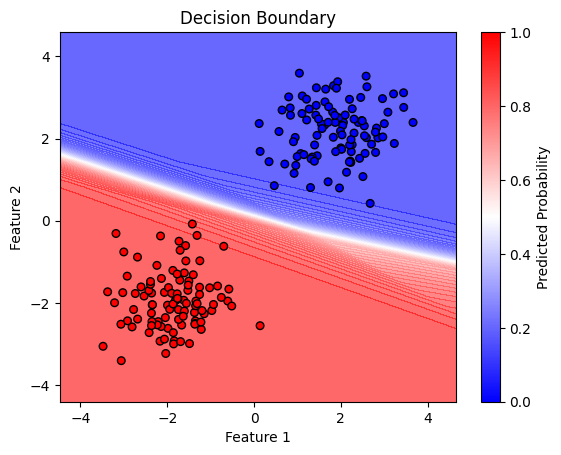

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# create a meshgrid of points over input space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = torch.meshgrid(
    torch.linspace(x_min, x_max, 200),
    torch.linspace(y_min, y_max, 200),
    indexing='ij'
)

# flatten grid points and run them through the model
grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
with torch.no_grad():
    probs = forward(grid).reshape(xx.shape)

# plot decision boundary
plt.contourf(xx, yy, probs, levels=50, cmap="bwr", alpha=0.6)

# overlay training data
plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), cmap="bwr", edgecolor='k', s=30)

plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Predicted Probability')
plt.show()